# Imports

In [2]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image
from skimage import io as skio
import skimage

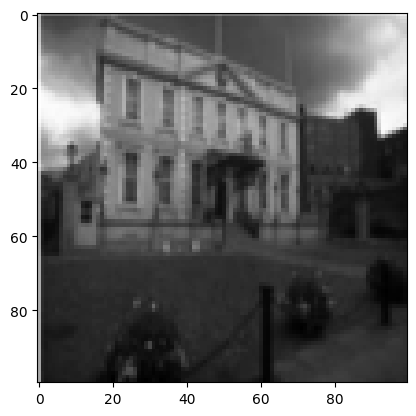

In [3]:
im = skio.imread('images/image_test_maison.png')
plt.imshow(im, cmap ="gray")
plt.show()

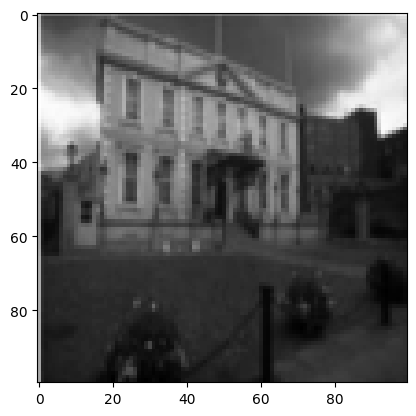

In [4]:
#im=skio.imread('/content/drive/MyDrive/Telecom/IMA/IMA201 - Introduction au traitement des images/PROJET IMA 201/images/lena.tif')
#im=skio.imread('/content/drive/MyDrive/PROJET IMA 201/images/aerien1.tif')[:100][:,:100]
#im = skio.imread('images/cafe.tif')[99:102][:,100:103]
import cv2
im = cv2.imread('images/image_test_maison.png',0)
plt.imshow(im, cmap ="gray")
plt.show()

In [5]:
im.shape

(100, 100)

# Chromatic/ Spatial Adjustment

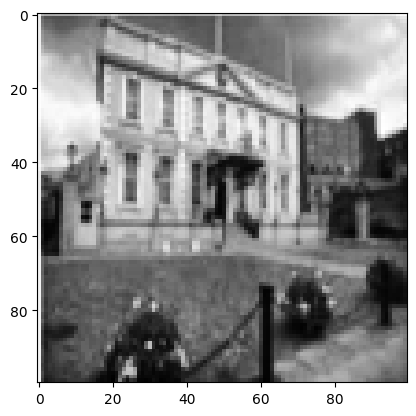

In [6]:
import math
#math.dist(currentPixel, [x,y])

rmax = 255

def calculateAdjustment(image, currentPixel):
  normalisation = 0
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      if [x,y] != currentPixel:
        normalisation += rmax/math.dist(currentPixel, [x,y])
  sum = 0
  
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      if [x,y] != currentPixel:
        func = 20*(int(image[currentPixel[0]][currentPixel[1]])-int(image[x][y]))
        if func > 255:
          func = 255
        elif func < -255:
          func = -255
        sum += func/math.dist(currentPixel, [x,y])
  return (sum/normalisation)

R = np.zeros(im.shape)
for x in range(im.shape[0]):
  for y in range(im.shape[1]):
    R[x][y] = calculateAdjustment(im, [x,y])

plt.imshow(R, cmap ="gray")
plt.show()

# (math.dist(p, q))

# Dynamic Tone Reproduction Scaling

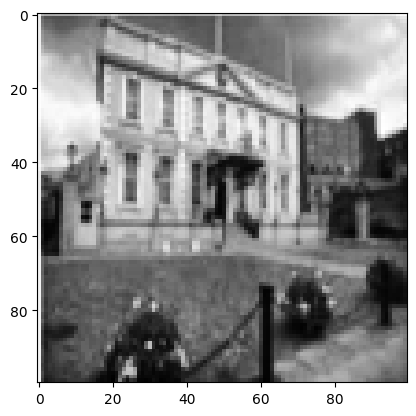

In [ ]:
plt.imshow(R, cmap ="gray")
plt.show()

In [7]:
min_pixel = 255
max_pixel = 0

for raw in R:
  for pixel in raw:
    if pixel < min_pixel:
      min_pixel = pixel
    if pixel > max_pixel:
      max_pixel = pixel


mc = min_pixel

Mc = max_pixel

In [8]:
sc = 255 / (Mc - mc)

In [9]:
(y,x)=R.shape
O = np.zeros((y,x))

for i in range(y):
  for j in range(x):
    O[i,j] = round((127.5 + sc*R[i,j]))

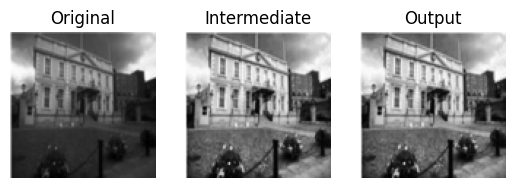

In [10]:
fig, axs = plt.subplots(1, 3)
axs[0].axis("off")
axs[0].imshow(im, cmap ="gray")
axs[0].set_title('Original')
axs[1].axis("off")
axs[1].imshow(R, cmap ="gray")
axs[1].set_title('Intermediate')
axs[2].axis("off")
axs[2].imshow(O, cmap ="gray")
axs[2].set_title('Output')


plt.show()

# Test

**Histograms**

In [59]:
hist_I = cv2.calcHist([im], [0], None, [256], [0, 256])
hist_R, bin_edges = np.histogram(R, bins=256)
hist_O, bin_edges = np.histogram(O, bins=256)

values_used_I = sum(1 for value in hist_I if value > 0)
percentage_used_dynamic_I = (values_used_I / 256) * 100

values_used_R = sum(1 for value in hist_R if value > 0)
percentage_used_dynamic_R = (values_used_R / 256) * 100

values_used_O = sum(1 for value in hist_O if value > 0)
percentage_used_dynamic_O = (values_used_O / 256) * 100

In [60]:
# Extraer los valores del histograma
hist_values_I = [int(hist) for hist in hist_I]
hist_values_R = [int(hist) for hist in hist_R]
hist_values_O = [int(hist) for hist in hist_O]

pixels = list(range(256))


C:\Users\juane\AppData\Local\Temp\ipykernel_24124\3326389987.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hist_values_I = [int(hist) for hist in hist_I]


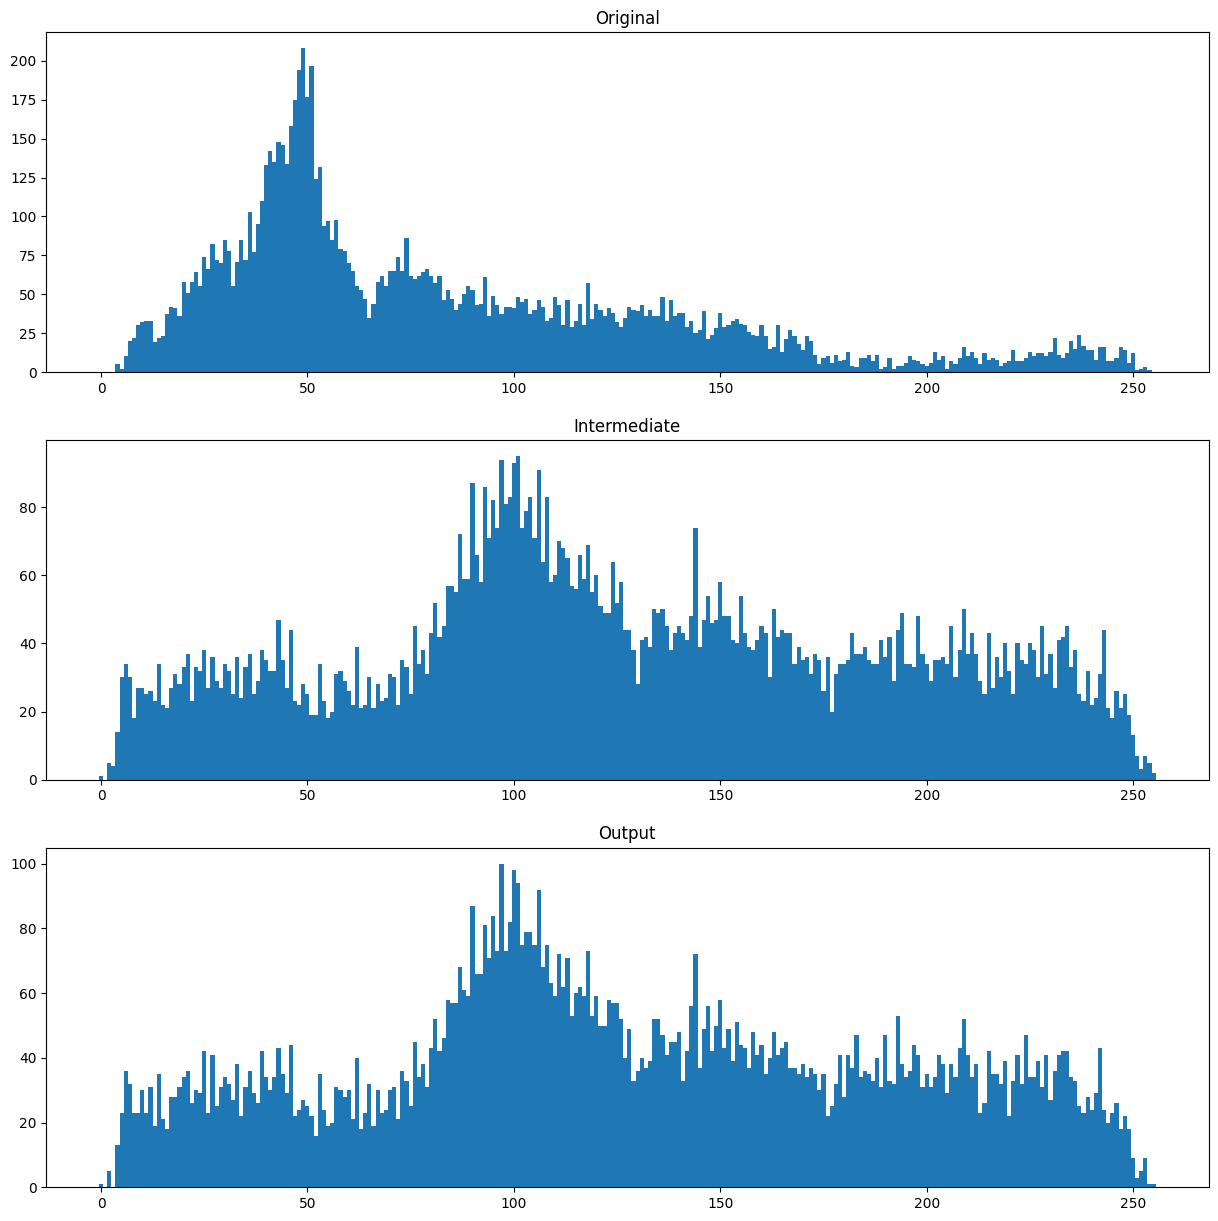

In [61]:
fig, axs = plt.subplots(3, 1)

fig.set_figheight(15)
fig.set_figwidth(15)

#Change 
axs[0].bar(pixels, hist_values_I, width=1.0)
axs[0].set_title('Original')

axs[1].bar(pixels, hist_values_R, width=1.0)
axs[1].set_title('Intermediate')

axs[2].bar(pixels, hist_values_O, width=1.0)
axs[2].set_title('Output')

plt.show()

**Statistics**

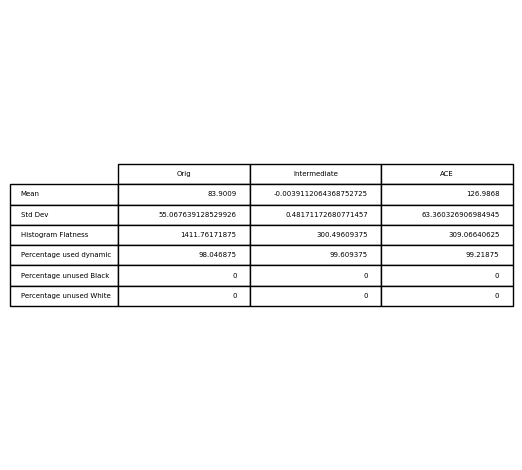

In [13]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')



data = [[im.mean(), R.mean() , O.mean()],
        [im.std(), R.std() , O.std()],
        [np.var(hist_I),np.var(hist_R),np.var(hist_O)],
        [percentage_used_dynamic_I,percentage_used_dynamic_R,percentage_used_dynamic_O],
        [0,0,0],
        [0,0,0]]

columns = ('Orig', 'Intermediate', 'ACE')
rows = ['Mean', 'Std Dev' ,'Histogram Flatness', 'Percentage used dynamic', 'Percentage unused Black', 'Percentage unused White']


ax.table(cellText=data,
          rowLabels=rows,
          colLabels=columns,
          loc='center')


fig.tight_layout()

plt.show()

**Color Constancy**

In [14]:
def calculateColorConstancy(I1 , I2):
  Emean = 1
  Edelta = 0

  if I1.shape == I2.shape :
    (sizey,sizex)=I1.shape


    for x in range(sizex):
      for y in range(sizey):
        Edelta += I1[x,y] - I2[x,y]

    Emean = Edelta / (sizey*sizex)
  return Emean

In [15]:
calculateColorConstancy(O,im)

43.0859